In [22]:
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

earthquake = fetch_mldata('global-earthquakes')

print (earthquake.data[0])
print (earthquake.target[2])


[  3.46098000e+04  -9.21000000e+00   1.50630000e+02   5.30000000e+00]
[ 1  1  1 ..., 19 19 19]


In [27]:
print(earthquake.data.shape)
print(earthquake.target.shape)
print(earthquake.int2.shape)

n = 59209      # no of data to plot on the graph
x = earthquake.data[:n,2]
y = earthquake.data[:n,1]
z = earthquake.int2[:n]
#z = z.reshape(1000,)

z.reshape(59209)
z = z[:n][0]
z = -z[:n]


print(x.shape, y.shape, z.shape)
print(x[0], y[0], z[0])

(59209, 4)
(3, 59209)
(1, 59209)
(59209,) (59209,) (59209,)
150.63 -9.21 -41


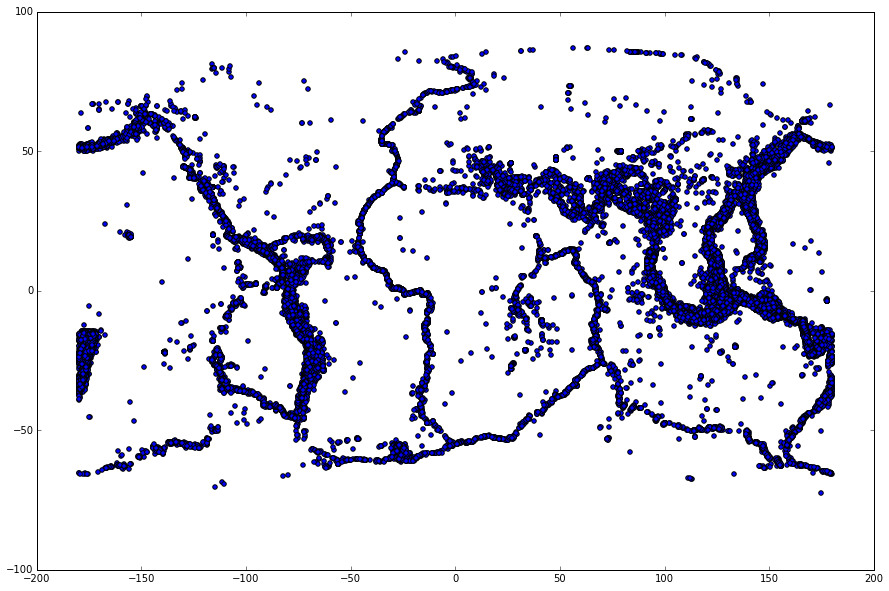

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(x,y)


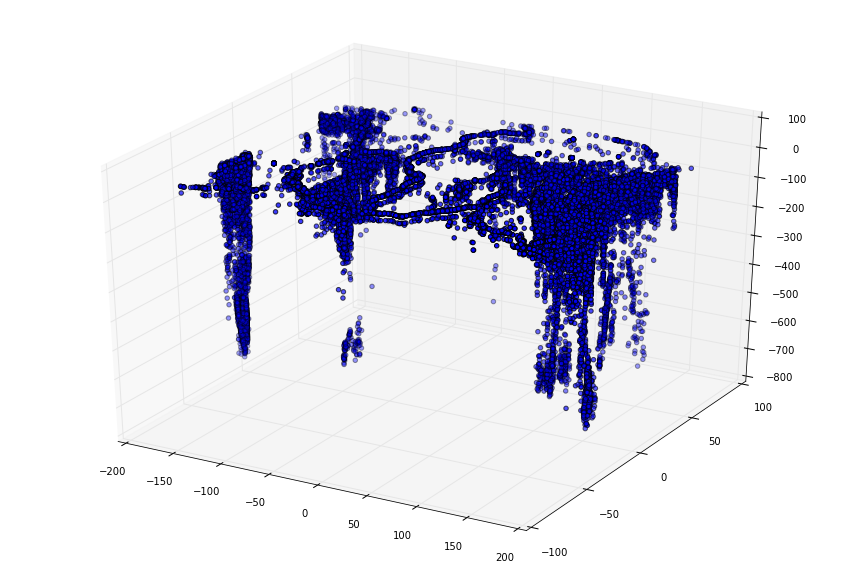

In [29]:

fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')

#sca(xs=xs, ys=ys, zs=0, zdir='z', s=20, c='b', depthshade=True)

ax.scatter(x, y,z)

In [30]:
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score

guide = fetch_mldata('svmguide4')


In [31]:
X = guide.data
y = guide.target

print(X[0], y[0])
X = preprocessing.normalize(X, norm='l2')

print(X[0])
print(X.shape, y.shape)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

[  2.10663000e-01   4.43414000e-03   1.29476000e-03   1.49976000e-04
   6.58719000e-08   9.95866000e-06  -5.34818000e-09   2.23000000e+00
   1.27000000e+00   1.28000000e+00] -1
[  7.32609028e-02   1.54203206e-03   4.50270273e-04   5.21561791e-05
   2.29078427e-08   3.46325849e-06  -1.85990181e-09   7.75512611e-01
   4.41659649e-01   4.45137284e-01]
(612, 10) (612,)
(367, 10) (367,)
(245, 10) (245,)


In [32]:
from sklearn import svm

C = 10000 # SVM regularization parameter
#svc_linear = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
svc_poly = svm.SVC(kernel='rbf', degree=2,max_iter=-1, C=C,random_state=101)
svc_poly.fit(X_train, y_train)

scores =cross_val_score(svc_poly,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)

print ("svc with poly mean=%0.3f std=%0.3f"% (np.mean(scores),np.std(scores)))
#y_predict = svc_linear.predict(X_test)

#print(y_predict == y_test)
#print("mean score: ", svc_linear.score(X_test, y_test))

y_predict = svc_poly.predict(X_test)

#print(y_predict, y_test)

print("mean score: ", svc_poly.score(X_test, y_test))
print(classification_report(y_test,y_predict))




#plt.scatter(X[:,0],X[:,1], c=y)

svc with poly mean=0.531 std=0.038
mean score:  0.595918367347
             precision    recall  f1-score   support

         -3       0.79      0.79      0.79        33
         -2       0.82      0.85      0.83        47
         -1       0.44      0.76      0.56        50
          1       0.00      0.00      0.00        39
          2       0.76      0.70      0.73        40
          3       0.37      0.39      0.38        36

avg / total       0.53      0.60      0.55       245



In [33]:
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn import svm

d = fetch_mldata('a1a')

X = d.data
y = d.target

#print(X[0], y[0])

print(X.shape, y.shape)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='rbf', degree=2,max_iter=-1, C=C,random_state=101)
clf.fit(X_train, y_train)

scores = cross_val_score(clf,X_train,y_train,cv=5,scoring='accuracy',n_jobs=-1)

print ("svc mean=%0.3f std=%0.3f" % (np.mean(scores),np.std(scores)))

y_pred = clf.predict(X_test)

print("mean score: ", clf.score(X_test, y_test))
print(classification_report(y_test,y_pred))

(32561, 123) (32561,)
(22792, 123) (22792,)
(9769, 123) (9769,)
svc mean=0.844 std=0.004
mean score:  0.845019961101
             precision    recall  f1-score   support

         -1       0.87      0.94      0.90      7397
          1       0.74      0.56      0.64      2372

avg / total       0.84      0.85      0.84      9769



In [34]:
%matplotlib inline
import numpy as np
from sklearn.datasets import fetch_mldata
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.cross_validation import cross_val_score
from sklearn import svm

d = fetch_mldata('abalone')

X = d.data[:,1:7]
y = d.target

print(X[0], y[0])

print(X.shape, y.shape)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

C = 1 # SVM regularization parameter
clf = svm.SVC(kernel='rbf', degree=2,max_iter=-1, C=C,random_state=101)
clf.fit(X_train, y_train)

scores = cross_val_score(clf,X_train,y_train,cv=2,scoring='accuracy',n_jobs=-1)

print ("svc mean=%0.3f std=%0.3f" % (np.mean(scores),np.std(scores)))

y_pred = clf.predict(X_test)

print("mean score: ", clf.score(X_test, y_test))
print(classification_report(y_test,y_pred))

[ 0.455   0.365   0.095   0.514   0.2245  0.101 ] 15
(4177, 6) (4177,)
(2923, 6) (2923,)
(1254, 6) (1254,)


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:413: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=2.
  % (min_labels, self.n_folds)), Warning)


svc mean=0.231 std=0.001
mean score:  0.257575757576
             precision    recall  f1-score   support

          1       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         4
          4       0.00      0.00      0.00        14
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        79
          7       0.25      0.67      0.37       115
          8       0.34      0.41      0.37       179
          9       0.26      0.53      0.35       211
         10       0.20      0.31      0.25       189
         11       0.12      0.02      0.03       154
         12       0.00      0.00      0.00        77
         13       0.00      0.00      0.00        60
         14       0.00      0.00      0.00        32
         15       0.00      0.00      0.00        31
         16       0.00      0.00      0.00        21
         17       0.00      0.00      0.00        12
         18       0.00      0.00      0.00   

/usr/local/lib/python3.4/dist-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Automatically created module for IPython interactive environment


ValueError: num must be 0 <= num <= 6, not 7

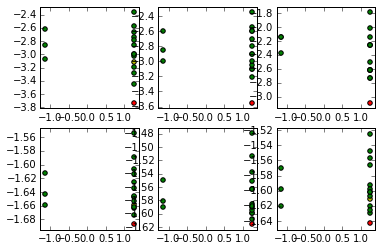

In [35]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

#from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 29
plot_colors = "bryg"
plot_step = 0.02

# Load data
iris = fetch_mldata('abalone')

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7],
                                [1, 0], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7],
                                [2, 0], [2, 1], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7],
                                [3, 0], [3, 1], [3, 2], [3, 4], [3, 5], [3, 6], [3, 7],
                                [4, 0], [4, 1], [4, 2], [4, 3], [4, 5], [4, 6], [4, 7],
                                [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 6], [5, 7],
                                [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 7],
                                [7, 0], [7, 1], [7, 2], [7, 4], [7, 5], [7, 6], [3, 7],
                               ]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    #clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step)                     np.arange(y_min, y_max, plot_step))

    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = Z.reshape(xx.shape)
    #cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    #plt.xlabel(iris.feature_names[pair[0]])
    #plt.ylabel(iris.feature_names[pair[1]])
    #plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

In [61]:
print("2 variables")
a = np.arange(8)
a.shape
print(a, type(a), a.shape)

b = [0,1,2,3,4,5,6,7]
print (b, type(b), len(b))

print("reshape the list to array")
import numpy as np
br = np.array(b)
print(br, type(br), br.shape)

print("reshape the array from (8,) to (8,1)")
ar = a.reshape(8,1)
print(ar, type(ar), ar.shape)

print("reshape the array to (4,2)")
arr = ar.reshape(4,2)
print(arr, type(arr), arr.shape)

print("reshape the array back to list")
ar = a.reshape(8,)  # also try a.reshape(8,1)
li = list(ar)
print(li, type(li), len(li))

2 variables
[0 1 2 3 4 5 6 7] <class 'numpy.ndarray'> (8,)
[0, 1, 2, 3, 4, 5, 6, 7] <class 'list'> 8
reshape the list to array
[0 1 2 3 4 5 6 7] <class 'numpy.ndarray'> (8,)
reshape the array from (8,) to (8,1)
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]] <class 'numpy.ndarray'> (8, 1)
reshape the array to (4,2)
[[0 1]
 [2 3]
 [4 5]
 [6 7]] <class 'numpy.ndarray'> (4, 2)
reshape the array back to list
[0, 1, 2, 3, 4, 5, 6, 7] <class 'list'> 8
